In [14]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
df = pd.read_csv(r"C:\Users\USER\Desktop\student_depression_dataset.csv")

In [16]:
df.replace('?', np.nan, inplace=True)

# Fill missing numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [17]:
# Step 1: Find all categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Step 2: Encode all categorical columns
from sklearn.preprocessing import LabelEncoder

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [18]:
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nInfo:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nFirst 5 records:")
print(df.head())
df.drop('id', axis=1, inplace=True)

Shape of dataset: (27901, 18)

Columns:
 ['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  int64  
 2   Age                                    27901 non-null  int64  
 3   City                                   27901 non-null  int64  
 4   Profession                             27901 non-null  int64  
 5   Academic Pressure                      27901 non-nu

In [19]:
X = df.drop('Depression', axis=1)
y = df['Depression']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

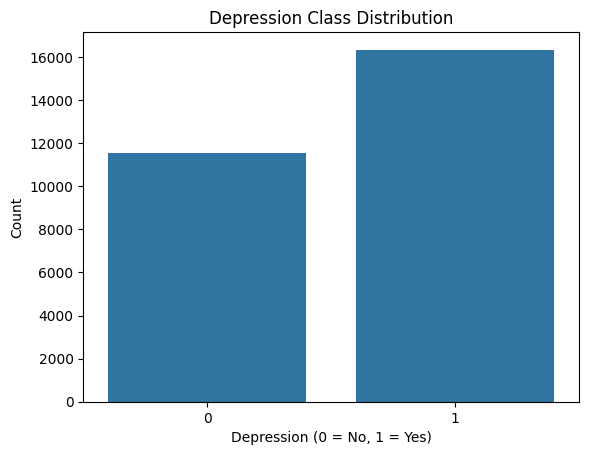

In [20]:
sns.countplot(x='Depression', data=df)
plt.title('Depression Class Distribution')
plt.xlabel('Depression (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

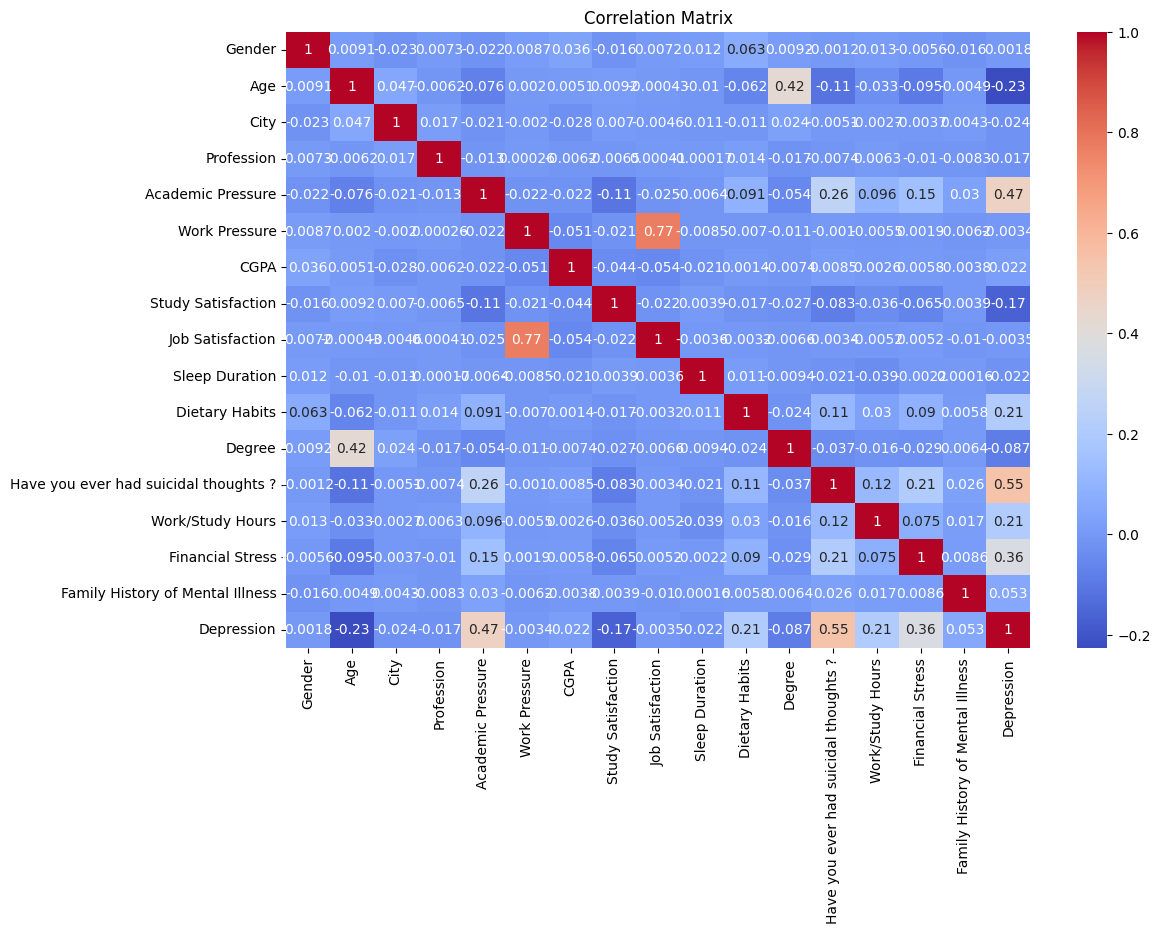

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

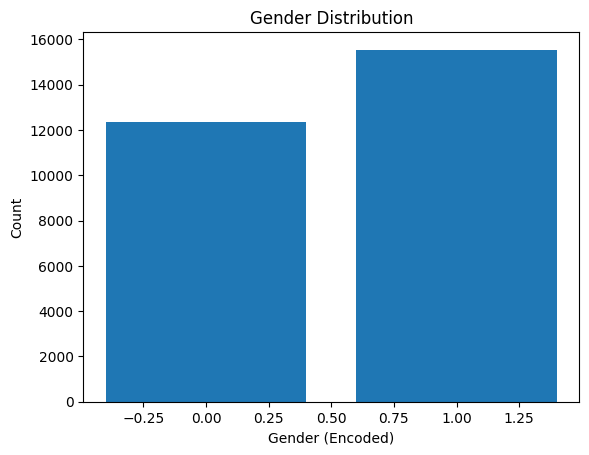

In [22]:
# Matplotlib - Bar Chart
plt.bar(df['Gender'].value_counts().index, df['Gender'].value_counts().values)
plt.title('Gender Distribution')
plt.xlabel('Gender (Encoded)')
plt.ylabel('Count')
plt.show()

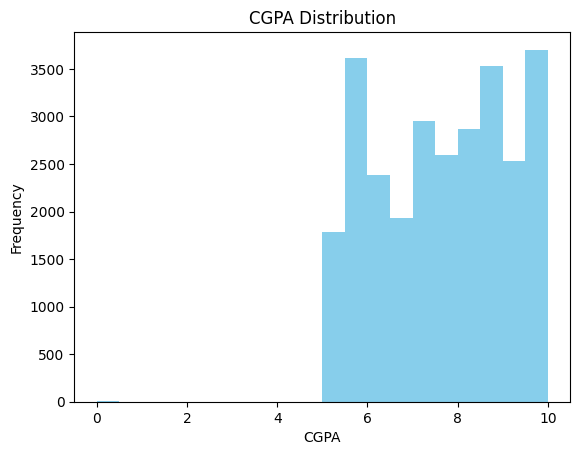

In [23]:
# Matplotlib - Histogram
plt.hist(df['CGPA'], bins=20, color='skyblue')
plt.title('CGPA Distribution')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

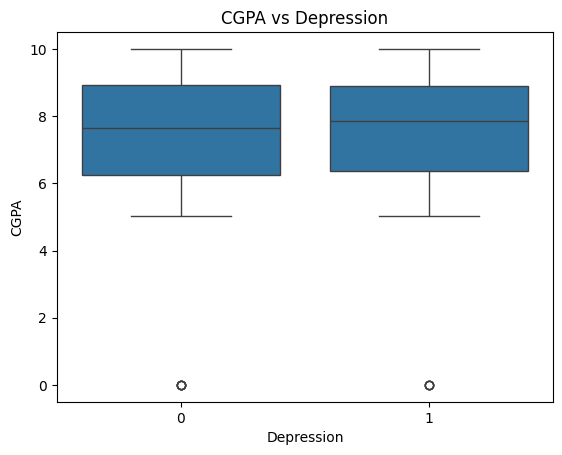

In [24]:
# Seaborn - Boxplot
sns.boxplot(x='Depression', y='CGPA', data=df)
plt.title('CGPA vs Depression')
plt.show()

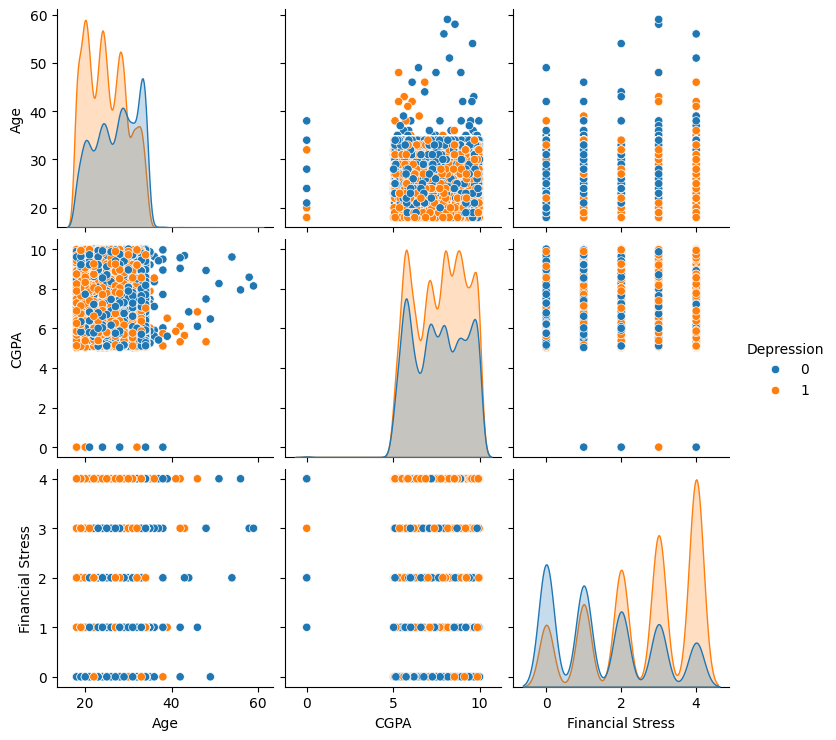

In [25]:
# Seaborn - Pairplot
sns.pairplot(df[['Age', 'CGPA', 'Financial Stress', 'Depression']], hue='Depression')
plt.show()

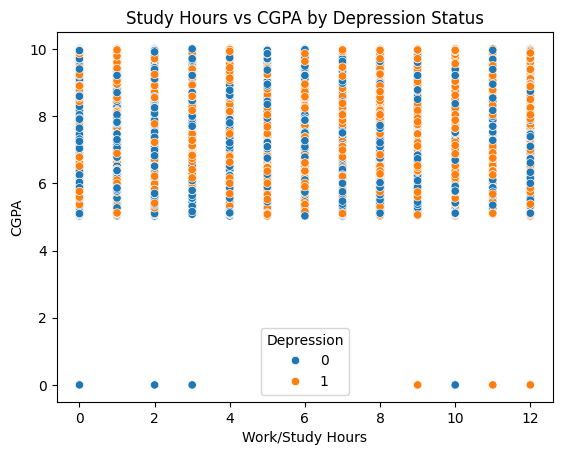

In [26]:
sns.scatterplot(x='Work/Study Hours', y='CGPA', hue='Depression', data=df)
plt.title('Study Hours vs CGPA by Depression Status')
plt.show()

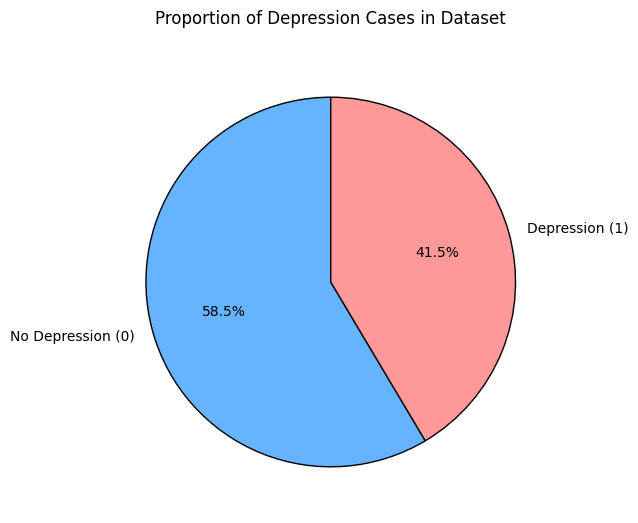

In [31]:
depression_counts = df['Depression'].value_counts()

labels = ['No Depression (0)', 'Depression (1)']
colors = ['#66b3ff', '#ff9999']

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    depression_counts, 
    labels=labels, 
    colors=colors,
    autopct='%1.1f%%', 
    startangle=90,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
plt.title('Proportion of Depression Cases in Dataset', pad=20)
plt.show()

In [27]:
# 7. Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [28]:
# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Predictions
y_pred = model.predict(X_test)

In [30]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8419543662644845

Confusion Matrix:
 [[2785  720]
 [ 603 4263]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81      3505
           1       0.86      0.88      0.87      4866

    accuracy                           0.84      8371
   macro avg       0.84      0.84      0.84      8371
weighted avg       0.84      0.84      0.84      8371

